# Importando Blibiotecas

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from neuralprophet import NeuralProphet
import seaborn as sns
import statsmodels.api as sm
from sklearn import metrics as me

c:\Users\marcio\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly_resampler\aggregation\aggregators.py:25: UserWarning: Could not import lttbc; will use a (slower) python alternative.
  warnings.warn("Could not import lttbc; will use a (slower) python alternative.")


# Importando os dados

In [2]:
df_demandas = pd.read_csv('C:/Users/marcio/Documents/Codigos/Prev_For_ULS/Resultados/tabelas/Demandas_treinamento/demandas')[['date','demandas']]
df_demandas.columns = ['ds','y']

# Fase de Testes

In [3]:
df_train, df_test = df_demandas.iloc[:166],df_demandas.iloc[166:]

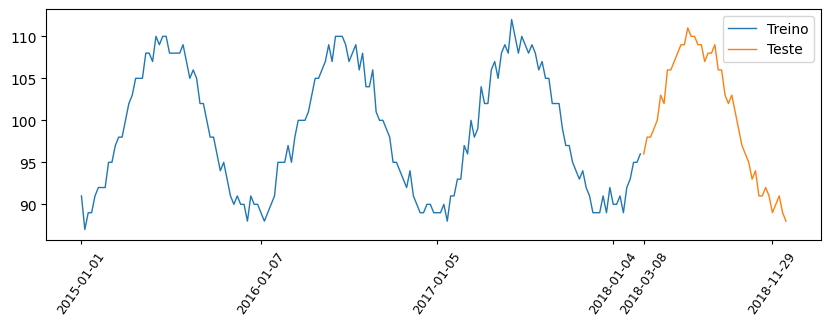

In [4]:
fig=plt.figure(figsize=(10,3))

ax=fig.add_subplot(1,1,1)
plt.plot(df_train.ds,df_train.y,label='Treino', linewidth=1)
plt.plot(df_test.ds,df_test.y,label='Teste', linewidth=1)
plt.xticks([df_demandas.iloc[i,0] for i in [0,53,105,157,166,204]])
plt.tick_params(axis='x', labelsize=9, length=3)
plt.legend()

for tick in ax.get_xticklabels():
    tick.set_rotation(55)


In [5]:
round(len(df_test)/len(df_demandas),4)

0.2057

In [6]:
qtd_previsoes = 1
n_lags = 17
confidence_level = 0.95

boundaries = round((1 - confidence_level) / 2, 2)#=0.025
# NeuralProphet only accepts quantiles value in between 0 and 1
quantiles = [boundaries, confidence_level + boundaries]#tirando 0.025 de cada lado
'''
indices_mudanca = [0,46,83,len(df_demandas)-1]
pontos_mudanca = [df_demandas.ds[i] for i in indices_mudanca]'''

'\nindices_mudanca = [0,46,83,len(df_demandas)-1]\npontos_mudanca = [df_demandas.ds[i] for i in indices_mudanca]'

In [7]:
params = { "growth": "off",
           "quantiles":quantiles,
           #"trend_reg": 0.01,
           #"changepoints_range":0.3,
           "n_forecasts":qtd_previsoes,
           "n_changepoints": 0,
           #"batch_size": 50,
           "n_lags": n_lags,
           "learning_rate": 0.1,
           "epochs": 500,
           #"changepoints": pontos_mudanca,
           "yearly_seasonality":2, #ao se colocar um numero, ele defini o grau da serie de fourier, por padrao e 6
           "weekly_seasonality":False,
           "daily_seasonality":False,
        }

In [8]:
model = NeuralProphet(**params)

In [9]:
metrics = model.fit(df_train,freq='7d')

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.398% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Training: 0it [00:00, ?it/s]

In [10]:
previsoes = model.predict(df_demandas)

INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.522% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.524% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


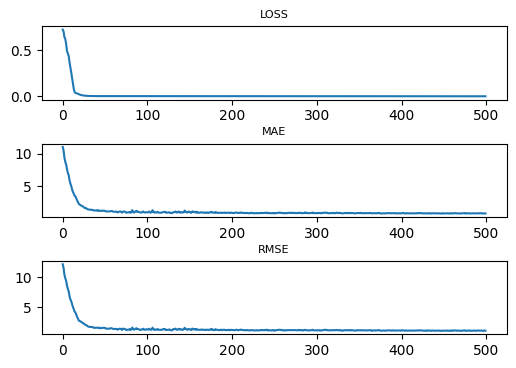

In [11]:
fig=plt.figure(figsize=(6,4))
plt.subplots_adjust(wspace=0.3, hspace=0.6)

ax=fig.add_subplot(3,1,1)
ax.set_title('LOSS',fontsize=8)
plt.plot(metrics.Loss)
plt.xticks([0,100,200,300,400,500])

ax=fig.add_subplot(3,1,2)
ax.set_title('MAE',fontsize=8)
plt.plot(metrics.MAE)
plt.xticks([0,100,200,300,400,500])

ax=fig.add_subplot(3,1,3)
ax.set_title('RMSE',fontsize=8)
plt.plot(metrics.RMSE)
plt.xticks([0,100,200,300,400,500])

plt.savefig('C:/Users/marcio/Documents/Codigos/Prev_For_ULS/Resultados/img/metricas_np.png', bbox_inches='tight',pad_inches = 0.1,format='png')


In [12]:
previsoes

,ds,y,yhat1,yhat1 5.0%,yhat1 95.0%,ar1,trend,season_yearly
0,2015-01-01,91.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-08,87.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-15,89.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-22,89.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-29,91.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
204,2018-11-29,89.0,89.638710,88.879601,90.408554,-0.261404,99.149223,-9.249113
205,2018-12-06,90.0,89.987572,89.003510,91.372276,0.458707,99.149223,-9.620359
206,2018-12-13,91.0,89.109116,88.645767,90.260841,-0.182943,99.149223,-9.857166
207,2018-12-20,89.0,88.857841,87.857903,90.341637,-0.334028,99.149223,-9.957355


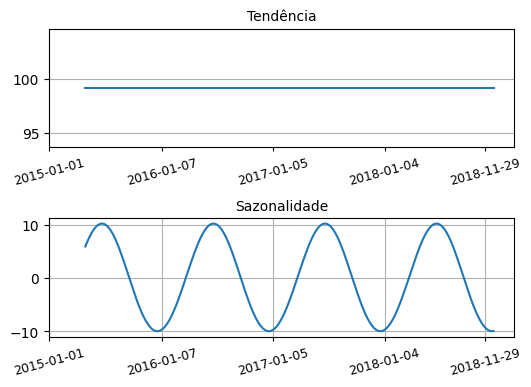

In [13]:
fig=plt.figure(figsize=(6,4))
plt.subplots_adjust(wspace=0, hspace=0.6)

ax=fig.add_subplot(2,1,1)
ax.set_title('Tendência',fontsize=10)
plt.plot(previsoes.ds,previsoes.trend)
plt.grid(axis='y')
plt.xticks([previsoes.ds.iloc[i] for i in [0,53,105,157,204]])
plt.tick_params(axis='x', labelsize=9, length=3)

for tick in ax.get_xticklabels():
    tick.set_rotation(15)


ax=fig.add_subplot(2,1,2)
ax.set_title('Sazonalidade',fontsize=10)
plt.plot(previsoes.ds,previsoes.season_yearly)
plt.grid(axis='both')
plt.xticks([previsoes.ds.iloc[i] for i in [0,53,105,157,204]])
plt.tick_params(axis='x', labelsize=9, length=3)

for tick in ax.get_xticklabels():
    tick.set_rotation(15)

plt.savefig('C:/Users/marcio/Documents/Codigos/Prev_For_ULS/Resultados/img/componentes.png', bbox_inches='tight',pad_inches = 0.1,format='png')



In [14]:
previsoes_test = previsoes['yhat1'].iloc[166:]

In [15]:

with open("C:/Users/marcio/Documents/Codigos/Prev_For_ULS/Resultados/tabelas/Prev_teste/test_pro.txt", "w") as arquivo:
    n = len(previsoes_test)
    for j in range(n-1):
        arquivo.write(f'{previsoes_test.values[j]},')
    arquivo.write(f'{previsoes_test.values[n-1]}')


In [16]:
interval = previsoes[['yhat1 5.0%','yhat1 95.0%']].iloc[166:]

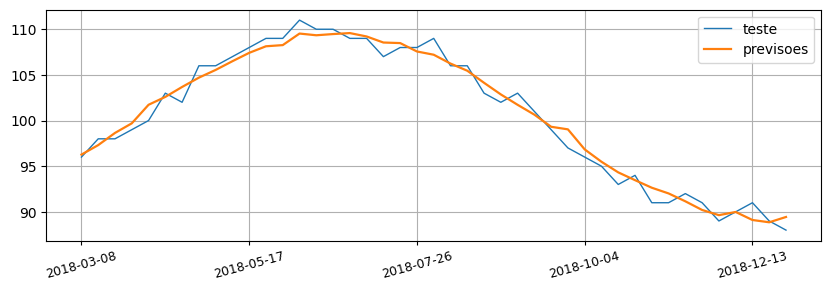

In [17]:
fig=plt.figure(figsize=(10,3))

ax=fig.add_subplot(1,1,1)
plt.plot(df_demandas.ds[166:],df_demandas.y[166:], label='teste', linewidth=1)
plt.plot(df_demandas.ds[166:],previsoes_test,label='previsoes', linewidth=1.6)


plt.xticks([df_demandas.iloc[166:].iloc[i,0] for i in [0,10,20,30,40]])
plt.tick_params(axis='x', labelsize=9, length=3)
for tick in ax.get_xticklabels():
    tick.set_rotation(15)
plt.legend()

plt.grid(axis='both')


In [18]:
residuos = np.array(df_test.y)-previsoes_test

$e_{i} = y_{i}-\hat{y}_{i}\sim N\left(0,30\right)$

In [19]:
normal = np.random.normal(0, 1,2000000)

$\mathbf{IMPORTANTE}$

Em modelos de séries temporais, não existem nenhuma suposição em relação aos resíduos, contudo, sabemos como o nosso resíduo e nossos dados se comportam, suas distribuições e etc, portanto usaremos isso a nosso favor para se construir um bom modelo. Por isso a análise de resíduo a seguir

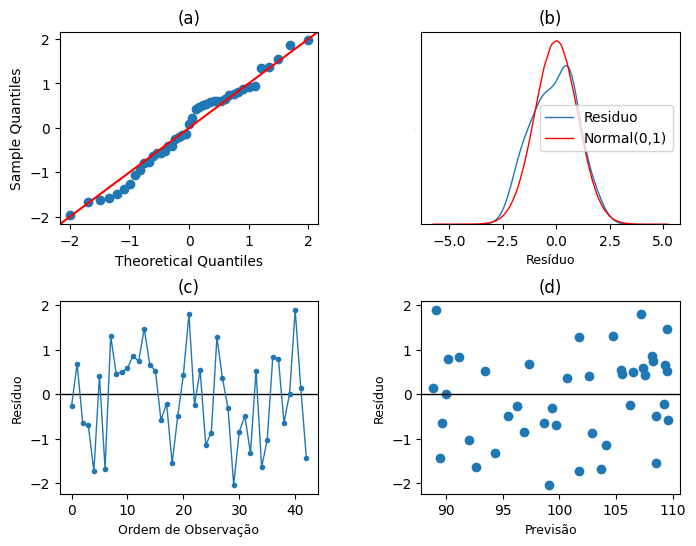

In [20]:
fig=plt.figure(figsize=(8,6))
titulo = ['(a)','(b)','(c)','(d)']
plt.subplots_adjust(wspace=0.4, hspace=0.4)

ax=fig.add_subplot(2,2,3)
ax.set_title(titulo[2])
plt. axhline(y=0,xmin=0,xmax=len(df_test.y),color='black', linewidth=1)
plt.plot(range(len(residuos)),residuos,marker='.', linewidth=1)
plt.ylabel('Resíduo',fontsize=9)
plt.xlabel('Ordem de Observação',fontsize=9)

ax=fig.add_subplot(2,2,2)
ax.set_title(titulo[1])
sns.kdeplot(residuos,label="Residuo", linewidth=1)
sns.kdeplot(normal,label='Normal(0,1)', linewidth=1,color='red')
plt.legend()
plt.yticks([])
plt.ylabel([], fontsize=0)
plt.xlabel('Resíduo',fontsize=9)

ax=fig.add_subplot(2,2,1)
ax.set_title(titulo[0])
sm.qqplot(residuos,fit=True,line='45',ax=ax)

ax=fig.add_subplot(2,2,4)
ax.set_title(titulo[3])
plt.scatter(previsoes_test,residuos)
plt.axhline(y=0,xmin=0,xmax=len(df_test.y),color='black', linewidth=1)
plt.ylabel('Resíduo',fontsize=9)
plt.xlabel('Previsão',fontsize=9)

plt.savefig('C:/Users/marcio/Documents/Codigos/Prev_For_ULS/Resultados/img/Np_Residuos.png', bbox_inches='tight',pad_inches = 0.1,format='png')
plt.show()

In [21]:
import statsmodels.api as sm

print('RMSE_Teste =',round(sm.tools.eval_measures.rmse(previsoes_test, df_test.y, axis=0),4))
print('MAE_Teste =',round(sm.tools.eval_measures.meanabs(previsoes_test, df_test.y, axis=0),4))
print(f'MAPE_Teste = {round(100*me.mean_absolute_percentage_error(df_test.y, previsoes_test),4)}%')

RMSE_Teste = 0.9999
MAE_Teste = 0.8518
MAPE_Teste = 0.8537%


MAE = $\frac{1}{n}\sum_{i=1}^{n}\mid y_{i}-\hat{y}\mid$ 

RMSE = $\sqrt{\frac{1}{n}\sum_{i=1}^{n}\left(y_{i}-\hat{y}\right)^{2}}$

MAPE = $\frac{100}{n}\sum_{i=1}^{n}\mid \frac{y_{i}-\hat{y}}{y_{i}}\mid$ 


## Estacionariedade dos Resíduos

In [22]:
from statsmodels.stats.diagnostic import acorr_ljungbox
jlung = acorr_ljungbox(residuos,lags=42)

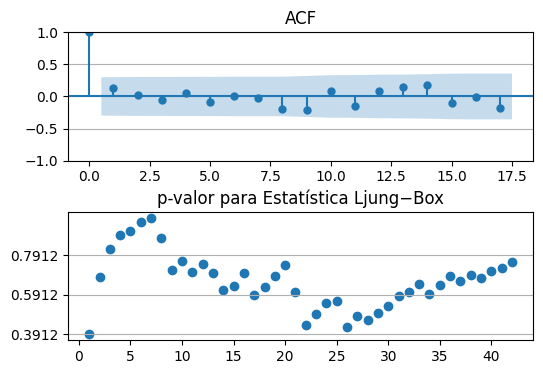

In [23]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig=plt.figure(figsize=(6,4))
plt.subplots_adjust(wspace=0, hspace=0.4)


ax=fig.add_subplot(2,1,1)
plot_acf(residuos,title='ACF',alpha=.05,ax=ax)
plt.grid(axis='y')

ax=fig.add_subplot(2,1,2)
plt.title('p-valor para Estatística Ljung−Box')
plt.scatter(range(1,43),jlung[jlung.columns[1]],marker='o')
plt.xticks([5*i for i in range(9)])
plt.yticks(np.arange(min(jlung[jlung.columns[1]]),max(jlung[jlung.columns[1]]),0.2))
plt.grid(axis='y')

plt.savefig('C:/Users/marcio/Documents/Codigos/Prev_For_ULS/Resultados/img/Residuo_ACF_Ljung_Box_np.png', bbox_inches='tight',pad_inches = 0.1,format='png')

plt.show()

In [24]:
min(jlung[jlung.columns[1]])

0.39124827973276255

In [25]:
params['n_lags'] = 17

# Fase de previsao

A própria da documentação, avisa de antes de fazer qualquer previsão real, reajuste o modelo para receber todos os dados

In [ ]:

for i in range(60):#prevendo i-esimo conjunto de demandas

    model = NeuralProphet(**params)
    metrics = model.fit(df_demandas,freq='7d')

    previsao = df_demandas.copy()
    interval = pd.DataFrame([],columns=['yhat1 5.0%','yhat1 95.0%'])

    for idx in range(17):#prevendo o conjunto de 17 demandas
        future = model.make_future_dataframe(df=previsao)
        #aqui são 17 datas passadas(do data frame inicial de demandas), e mais uma outra no futuro do data frame previsao
        temp = model.predict(future)
        #prever apenas o valor da data futura, contudo o data frame tem os 17 valores das datas passadas como nan
        temp['y'] = temp[['y','yhat1']].fillna(0).sum(axis=1)
        interval = interval.append(temp[['yhat1 5.0%','yhat1 95.0%']].iloc[17])
        previsao = previsao.append(temp[['ds','y']].iloc[-1])

    interval.reset_index(drop=True,inplace=True)
    interval.to_csv(f'C:/Users/marcio/Documents/Codigos/Prev_For_ULS/Resultados/tabelas/Intervalos_Confianca/NP/IC_NP{i}')
    previsao = previsao.iloc[-17:].reset_index(drop=True).y

    #salvando as previsao
    with open(f"C:/Users/marcio/Documents/Codigos/Prev_For_ULS/Resultados/tabelas/Previsoes/Prev_pro/Previsao_pro{i}.txt", "w") as arquivo:

        n = len(previsao)
        for j in range(n-1):
            arquivo.write(f'{previsao[j]}, ')
        arquivo.write(f'{previsao[n-1]}')
